In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
belmont = pd.read_csv('../datasets/belmont.csv')
michelson = pd.read_csv('../datasets/michelson_speed_of_light.csv', index_col=0)
all_states = pd.read_csv('../datasets/2008_all_states.csv')
swing_states = pd.read_csv('../datasets/2008_swing_states.csv')
flowers = pd.read_csv('../datasets/flowers.csv')

flowers.head() # Display the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Introduction to summary statistics: The sample mean and median

### Computing means

In [14]:
versicolor_petal_length = np.array(flowers[flowers.species == 'versicolor']['petal length (cm)'])
versicolor_petal_width = np.array(flowers[flowers.species == 'versicolor']['petal width (cm)'])
setosa_petal_length = np.array(flowers[flowers.species == 'setosa']['petal length (cm)'])
virginica_petal_length = np.array(flowers[flowers.species == 'virginica']['petal length (cm)']) 

In [15]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


# Percentiles, outliers, and box plots

In [16]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

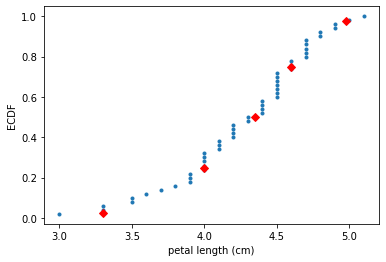

In [18]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


### Box-and-whisker plot

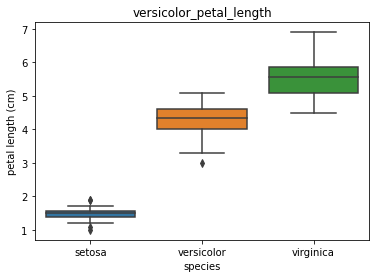

In [19]:
df = flowers

# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.title('versicolor_petal_length')
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


# Variance and standard deviation

In [20]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

In [21]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


# Covariance and the Pearson correlation coefficient

### Scatter plots

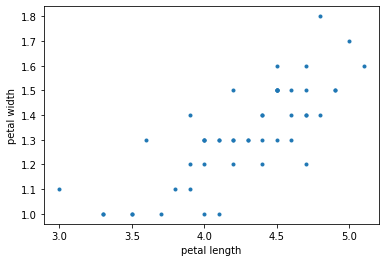

In [22]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal length')
plt.ylabel('petal width')

# Show the result
plt.show()

### Computing the covariance

In [23]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

In [24]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat =  np.corrcoef(x, y) 

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
